In [ ]:
pip install nltk

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

# Web Scraping


In [ ]:
!pip install requests beautifulsoup4


In [ ]:
import requests
from bs4 import BeautifulSoup

def scrape_reviews(url):
    # Send a GET request to the URL
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find the elements containing reviews and review dates
        review_elements = soup.find_all(class_='review')  # Adjust the class name as per the actual HTML structure
        date_elements = soup.find_all(class_='review-date')  # Adjust the class name as per the actual HTML structure

        # Extract the text from the review and date elements
        reviews = [review.get_text() for review in review_elements]
        dates = [date.get_text() for date in date_elements]

        # Return the extracted reviews and dates
        return reviews, dates
    else:
        # If the request was unsuccessful, print an error message
        print("Failed to retrieve page:", response.status_code)
        return None, None

# Example usage
url = "https://www.myntra.com/wallets/puma/puma-textured-leather-wallets/25815660/buy"
reviews, dates = scrape_reviews(url)

if reviews and dates:
    for review, date in zip(reviews, dates):
        print("Review:", review)
        print("Date:", date)
        print("------")
else:
    print("No reviews found.")


No reviews found.


# Exploratory data analysis

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dataset  = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ml project/dataset1.csv")

In [ ]:
dataset.head(10)
dataset.shape

(5000, 24)

In [ ]:
df1 = dataset.iloc[:1000]
df1

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,AWMjT0WguC1rwyj_rFh3,2018-05-02T14:01:51Z,2018-09-21T19:44:16Z,Amazon - Echo Plus w/ Built-In Hub - Silver,B06XB29FPF,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",https://pisces.bbystatic.com/image2/BestBuy_US...,amazonamazonechoplussmartspeakerwithalexaphili...,...,2018-04-26T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/6036024/revie...,What an amazing piece of technology. I was imp...,Amazing Tech,BBConsumer,https://www.newegg.com/Product/Product.aspx%25...
996,AWMjT0WguC1rwyj_rFh3,2018-05-02T14:01:51Z,2018-09-21T19:44:16Z,Amazon - Echo Plus w/ Built-In Hub - Silver,B06XB29FPF,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",https://pisces.bbystatic.com/image2/BestBuy_US...,amazonamazonechoplussmartspeakerwithalexaphili...,...,2018-04-26T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/6036024/revie...,I bought it for my family and everyone loves i...,Great for Every Home,

In [ ]:
DF = dataset[dataset['id'] == 'AVqVGZNvQMlgsOJE6eUY']

In [ ]:
DF.columns


Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')

In [ ]:
DF['name']

0     Amazon Kindle E-Reader 6" Wifi (8th Generation...
1     Amazon Kindle E-Reader 6" Wifi (8th Generation...
2     Amazon Kindle E-Reader 6" Wifi (8th Generation...
3     Amazon Kindle E-Reader 6" Wifi (8th Generation...
4     Amazon Kindle E-Reader 6" Wifi (8th Generation...
                            ...                        
91    Amazon Kindle E-Reader 6" Wifi (8th Generation...
92    Amazon Kindle E-Reader 6" Wifi (8th Generation...
93    Amazon Kindle E-Reader 6" Wifi (8th Generation...
94    Amazon Kindle E-Reader 6" Wifi (8th Generation...
95    Amazon Kindle E-Reader 6" Wifi (8th Generation...
Name: name, Length: 96, dtype: object

In [ ]:
DF = DF[['reviews.date','reviews.text']]
DF

,reviews.date,reviews.text
0,2017-09-03T00:00:00.000Z,I thought it would be as big as small paper bu...
1,2017-06-06T00:00:00.000Z,This kindle is light and easy to use especiall...
2,2018-04-20T00:00:00.000Z,Didnt know how much i'd use a kindle so went f...
3,2017-11-02T17:33:31.000Z,I am 100 happy with my purchase. I caught it o...
4,2018-04-24T00:00:00.000Z,Solid entry level Kindle. Great for kids. Gift...
...,...,...
91,2018-01-21T00:00:00.000Z,"I love having real books, but these are great ..."
92,2017-01-07T00:00:00.000Z,It's a perfect gift for young adult during the...
93,2016-12-08T00:00:00.000Z,"The screen is too dark, and cannot adjust the ..."
94,2017-12-23T00:00:00.000Z,I should have purchased a kindle sooner. It's ...


# Importing Mistral Model

In [ ]:
# # Use a pipeline as a high-level helper
# from transformers import pipeline

# pipe = pipeline("text-generation", model="mistralai/Mistral-7B-v0.1")

In [ ]:
# # Load model directly
# from transformers import AutoTokenizer, AutoModelForCausalLM

# tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-v0.1")
# model = AutoModelForCausalLM.from_pretrained("mistralai/Mistral-7B-v0.1")

In [ ]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 3.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
from sentence_transformers import SentenceTransformer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
model = SentenceTransformer('microsoft/MiniLM-L12-H384-uncased')
# sentence_embedding = model.encode(sentence


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

# Sentimental Analysis

In [ ]:
sid = SentimentIntensityAnalyzer()


In [ ]:
def get_sentence_embedding(text):
    return model.encode([text])[0]

DF['sentence_embedding'] = DF['reviews.text'].apply(get_sentence_embedding)

DF['sentiment_score'] = DF['reviews.text'].apply(lambda x: sid.polarity_scores(x)['compound'])

DF['sentiment'] = DF['sentiment_score'].apply(lambda score: 'positive' if score > 0.3 else ('negative' if score < 0 else 'neutral'))



In [ ]:
DF

,reviews.date,reviews.text,date
0,2017-09-03 00:00:00+00:00,I thought it would be as big as small paper bu...,2017-09-03
1,2017-06-06 00:00:00+00:00,This kindle is light and easy to use especiall...,2017-06-06
2,2018-04-20 00:00:00+00:00,Didnt know how much i'd use a kindle so went f...,2018-04-20
3,2017-11-02 17:33:31+00:00,I am 100 happy with my purchase. I caught it o...,2017-11-02
4,2018-04-24 00:00:00+00:00,Solid entry level Kindle. Great for kids. Gift...,2018-04-24
...,...,...,...
91,2018-01-21 00:00:00+00:00,"I love having real books, but these are great ...",2018-01-21
92,2017-01-07 00:00:00+00:00,It's a perfect gift for young adult during the...,2017-01-07
93,2016-12-08 00:00:00+00:00,"The screen is too dark, and cannot adjust the ...",2016-12-08
94,2017-12-23 00:00:00+00:00,I should have purchased a kindle sooner. It's ...,2017-12-23


In [ ]:

DF['reviews.date'] = DF['reviews.date'] + pd.DateOffset(years=6)

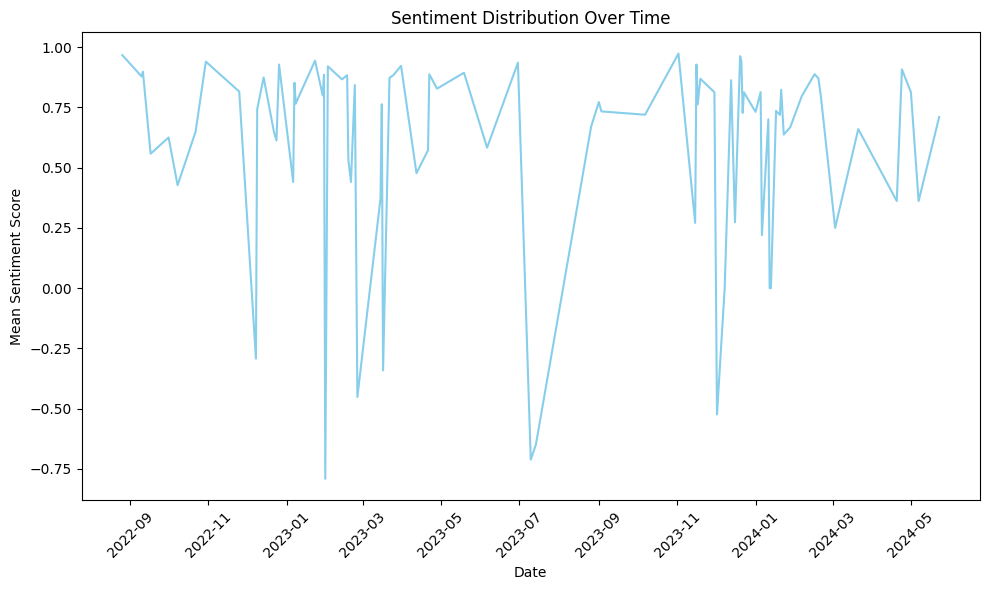

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas as pd

# Convert 'reviews.date' column to datetime
DF['reviews.date'] = pd.to_datetime(DF['reviews.date'])

# Extract date from 'reviews.date' column
DF['date'] = DF['reviews.date'].dt.date

# Group by date and calculate mean sentiment score
sentiment_over_time = DF.groupby('date')['sentiment_score'].mean()

# Plot sentiment distribution over time
plt.figure(figsize=(10, 6))
sentiment_over_time.plot(color='skyblue')
plt.title('Sentiment Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


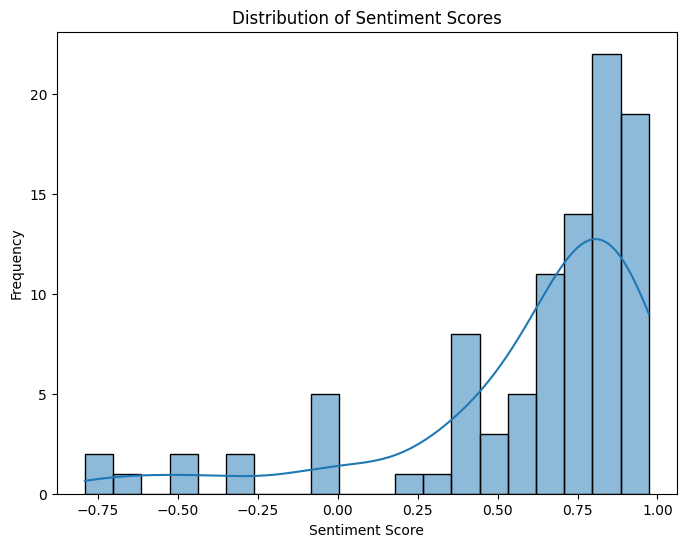

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(DF['sentiment_score'], bins=20, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


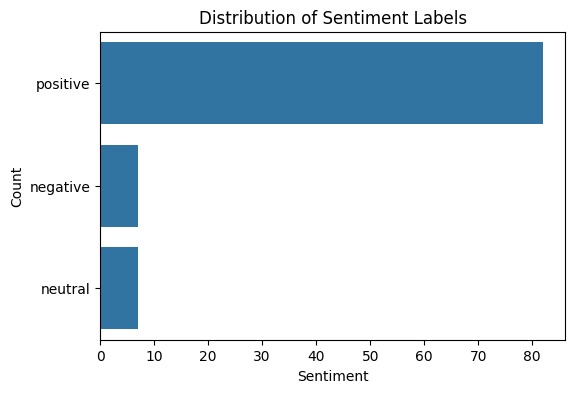

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(DF['sentiment'])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
DF

,reviews.date,reviews.text,date,sentence_embedding,sentiment_score,sentiment
0,2023-09-03 00:00:00+00:00,I thought it would be as big as small paper bu...,2023-09-03,"[-0.08276559, 0.032166265, -0.04497064, 0.0710...",0.7329,positive
1,2023-06-06 00:00:00+00:00,This kindle is light and easy to use especiall...,2023-06-06,"[-0.10093733, 0.050157722, 0.16424763, 0.03509...",0.5826,positive
2,2024-04-20 00:00:00+00:00,Didnt know how much i'd use a kindle so went f...,2024-04-20,"[0.0714141, 0.03766399, 0.09167352, 0.03976388...",0.3612,positive
3,2023-11-02 17:33:31+00:00,I am 100 happy with my purchase. I caught it o...,2023-11-02,"[0.017900098, 0.0055730315, -0.014896724, 0.04...",0.9727,positive
4,2024-04-24 00:00:00+00:00,Solid entry level Kindle. Great for kids. Gift...,2024-04-24,"[-0.056979105, 0.0957623, 0.064652435, 0.00061...",0.9072,positive
...,...,...,...,...,...,...
91,2024-01-21 00:00:00+00:00,"I love having real books, but these are great ...",2024-01-21,"[-0.06908247, 0.057927985, -0.0064385054, 0.05...",0.8228,positive
92,2023-01-07 00:00:00+00:00,It's a perfect gift for young adult during the...,2023-01-07,"[-0.106499344, 0.24118574, 0.1981145, -0.07168...",0.8519,positive
93,2022-12-08 00:00:00+00:00,"The screen is too dark, and cannot adjust the ...",2022-12-08,"[0.03189127, 0.24979636, 0.09504258, 0.0031976...",-0.2924,negative
94,2023-12-23 00:00:00+00:00,I should have purchased a kindle sooner. It's ...,2023-12-23,"[-0.103553966, -0.032419898, 0.080272906, 0.11...",0.8122,positive


In [ ]:
# Feature engineering
# Convert the 'reviews.date' column to datetime format
DF['reviews.date'] = pd.to_datetime(DF['reviews.date'])

# Extract additional features
DF['review_length'] = DF['reviews.text'].apply(len)
DF['month'] = DF['reviews.date'].dt.month
DF['day_of_week'] = DF['reviews.date'].dt.dayofweek

# Prepare features (X) and target variable (y)
X = DF[['review_length', 'month', 'day_of_week']]
y = DF['sentiment']


#SVM

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler


In [ ]:
X = np.array(DF['sentence_embedding'].tolist())

# Split features (X) and target variable (y)
y = DF['sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data (scale the features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the model
svm_classifier.fit(X_train_scaled, y_train)

# Predictions
svm_predictions = svm_classifier.predict(X_test_scaled)

# Evaluation metrics
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')
svm_classification_report = classification_report(y_test, svm_predictions)

# Print the evaluation metrics
print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1 Score:", svm_f1)
print("SVM Classification Report:\n", svm_classification_report)

SVM Accuracy: 0.95
SVM Precision: 0.975
SVM Recall: 0.95
SVM F1 Score: 0.9576576576576578
SVM Classification Report:
               precision    recall  f1-score   support

     neutral       0.50      1.00      0.67         1
    positive       1.00      0.95      0.97        19

    accuracy                           0.95        20
   macro avg       0.75      0.97      0.82        20
weighted avg       0.97      0.95      0.96        20



# KNN

In [ ]:
X = np.array(DF['sentence_embedding'].tolist())

# Split features (X) and target variable (y)
y = DF['sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data (scale the features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_classifier.fit(X_train_scaled, y_train)

# Predictions
knn_predictions = knn_classifier.predict(X_test_scaled)

# Evaluation metrics
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions, average='weighted')
knn_recall = recall_score(y_test, knn_predictions, average='weighted')
knn_f1 = f1_score(y_test, knn_predictions, average='weighted')
knn_classification_report = classification_report(y_test, knn_predictions)

# Print the evaluation metrics
print("KNN Accuracy:", knn_accuracy)
print("KNN Precision:", knn_precision)
print("KNN Recall:", knn_recall)
print("KNN F1 Score:", knn_f1)
print("KNN Classification Report:\n", knn_classification_report)

KNN Accuracy: 0.9
KNN Precision: 0.9
KNN Recall: 0.9
KNN F1 Score: 0.9
KNN Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00         0
     neutral       0.00      0.00      0.00         1
    positive       0.95      0.95      0.95        19

    accuracy                           0.90        20
   macro avg       0.32      0.32      0.32        20
weighted avg       0.90      0.90      0.90        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWa

# Logistic Regression

In [ ]:
X = np.array(DF['sentence_embedding'].tolist())

# Split features (X) and target variable (y)
y = DF['sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data (scale the features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42)

# Train the model
lr_classifier.fit(X_train_scaled, y_train)

# Predictions
lr_predictions = lr_classifier.predict(X_test_scaled)

# Evaluation metrics
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions, average='weighted')
lr_recall = recall_score(y_test, lr_predictions, average='weighted')
lr_f1 = f1_score(y_test, lr_predictions, average='weighted')
lr_classification_report = classification_report(y_test, lr_predictions)

# Print the evaluation metrics
print("LR Accuracy:", lr_accuracy)
print("LR Precision:", lr_precision)
print("LR Recall:", lr_recall)
print("LR F1 Score:", lr_f1)
print("LR Classification Report:\n", lr_classification_report)

LR Accuracy: 1.0
LR Precision: 1.0
LR Recall: 1.0
LR F1 Score: 1.0
LR Classification Report:
               precision    recall  f1-score   support

     neutral       1.00      1.00      1.00         1
    positive       1.00      1.00      1.00        19

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



# Correlation Matrix

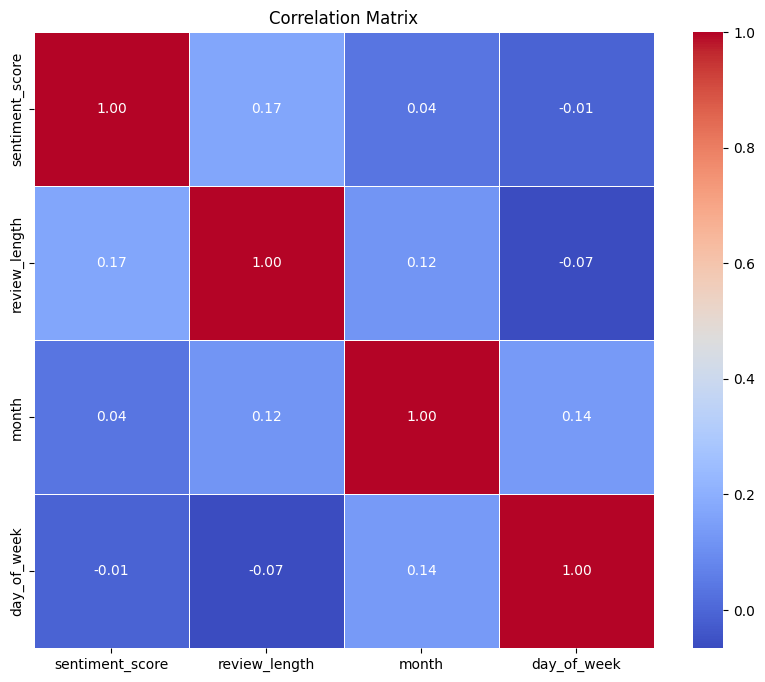

In [ ]:
# Exclude non-numeric columns
numeric_cols = DF.select_dtypes(include=[np.number]).columns
numeric_df = DF[numeric_cols]

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()